In [1]:
import math
import numpy as np
# pow 함수 제곱함수 ex pow(2, 4) -> 16
def dist(a, b):
    return math.sqrt(math.pow(a[0]-b[0],2) + math.pow(a[1]-b[1],2))

In [2]:
centroids = [(2, 5), (8, 3),(4, 5)]
x = (0, 8)

In [3]:
centroid_distances =[]
for centroid in centroids:
    centroid_distances.append(dist(x,centroid))
print(centroid_distances)
print(np.argmin(centroid_distances))

[3.605551275463989, 9.433981132056603, 5.0]
0


In [4]:
cluster_1_points = [(0, 8), (3,8), (3,4)]

In [5]:
mean =[(0+3+3)/3, (8+8+4)/3]
print(mean)

[2.0, 6.666666666666667]


In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import math 
%matplotlib inline

In [7]:
X, y = make_blobs(n_samples=1500, centers=3, n_features=2, random_state=800)
centroids = [[-6,2],[3,-4],[-5,10]]

In [8]:
X

array([[-3.83458347,  6.09210705],
       [-4.62571831,  5.54296865],
       [-2.87807159, -7.48754592],
       ...,
       [-3.709726  , -7.77993633],
       [-8.44553266, -1.83519866],
       [-4.68308431,  6.91780744]])

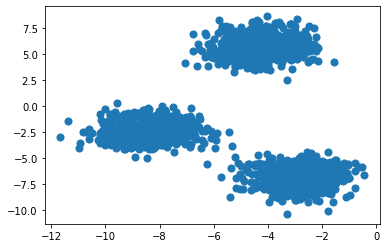

In [9]:
plt.scatter(X[:, 0], X[:, 1], s=50, cmap='tab20b')
plt.show()

In [10]:
y

array([2, 2, 1, ..., 1, 0, 2])

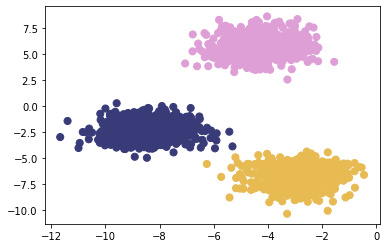

In [11]:
plt.scatter(X[:,0], X[:,1],c=y, s=50, cmap='tab20b')
plt.show()

In [12]:
def dist(a, b):
    return math.sqrt(math.pow(a[0]-b[0],2) + math.pow(a[1]-b[1],2))

In [13]:
from scipy.spatial.distance import cdist

In [14]:
X[105:110]

array([[-3.09897933,  4.79407445],
       [-3.37295914, -7.36901393],
       [-3.372895  ,  5.10433846],
       [-5.90267987, -3.28352194],
       [-3.52067739,  7.7841276 ]])

In [15]:
for x in X[105:110]:
    calcs = []
    for c in centroids:
        calcs.append(dist(x, c))
    print(calcs, "Cluster Membership: ", np.argmin(calcs, axis=0))

[4.027750355981394, 10.70202290628413, 5.542160268055164] Cluster Membership:  0
[9.73035280174993, 7.208665829113462, 17.44505393393603] Cluster Membership:  1
[4.066767506545852, 11.113179986633003, 5.1589701124301515] Cluster Membership:  0
[5.284418164665783, 8.931464028407861, 13.314157359115697] Cluster Membership:  0
[6.293105164930943, 13.467921029846712, 2.664298385076878] Cluster Membership:  2


In [16]:
def k_means(X, K):
# K-Means Clustering History 
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    while True:
# Centroid와의 각 포인트간 E.D.
# np.argmin 반환
# -> 최소값의 색인 위치
# (최소거리 값 = 각 클러스의 포인트)의 인덱스 할당    
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
        
# 새 centroid 연산을 위한 클러스터내 포인트간의 mean 값 연산 :
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        # Centroid의 변화 없다면, K-Means 프로세스 종료 if not, 프로세스 지속
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

centers, labels, centers_hist, labels_hist = k_means(X, 3)

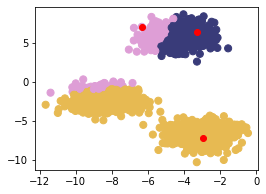

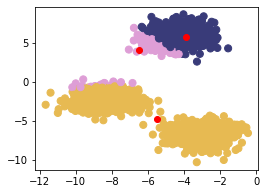

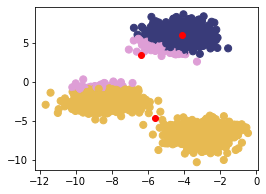

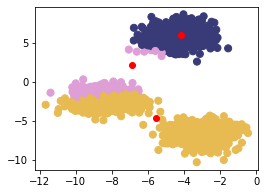

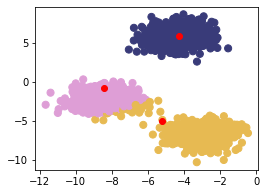

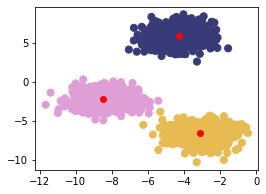

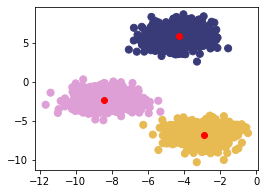

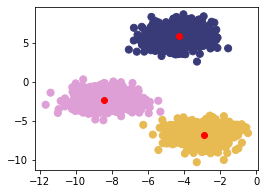

In [17]:
history = zip(centers_hist, labels_hist)

for x, y in history:
    plt.figure(figsize=(4,3))
    plt.scatter(X[:, 0], X[:, 1], c=y,
            s=50, cmap='tab20b');
    plt.scatter(x[:, 0], x[:, 1], c='red')
    plt.show()


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
iris = pd.read_csv('./Data/iris_sample_data.csv', header=None)
iris.columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm', 'species']

In [19]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
'PetalWidthCm']]

In [20]:
# K는 centroids 3를 의미함
def k_means(X, K):
# K-Means Clustering History 
    centroids_history = []
    labels_history = []
    rand_index = np.random.choice(X.shape[0], K)  
    centroids = X[rand_index]
    centroids_history.append(centroids)
    while True:
# Centroid와의 각 포인트간 E.D.
# np.argmin 반환
# -> 최소값의 색인 위치
# (최소거리 값 = 각 클러스의 포인트)의 인덱스 할당    
        labels = np.argmin(cdist(X, centroids), axis=1)
        labels_history.append(labels)
        
# 새 centroid 연산을 위한 클러스터내 포인트간의 mean 값 연산 :
        new_centroids = np.array([X[labels == i].mean(axis=0)
                                for i in range(K)])
        centroids_history.append(new_centroids)
        
        # Centroid의 변화 없다면, K-Means 프로세스 종료 if not, 프로세스 지속
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, labels, centroids_history, labels_history

In [21]:
X_mat = X.values

In [22]:
centroids, labels, centroids_history, labels_history = k_means(X_mat,3)

In [23]:
# 0.5 ~1에 있을수록 유효한 신뢰 스코어라고 할 수 있음
silhouette_score(X[['PetalLengthCm','PetalWidthCm']], labels)

0.44168506749093545

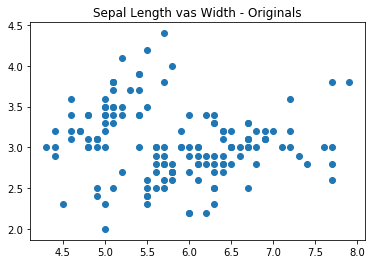

In [24]:
plt.scatter(X['SepalLengthCm'], X['SepalWidthCm'])
plt.title('Sepal Length vas Width - Originals')
plt.show()

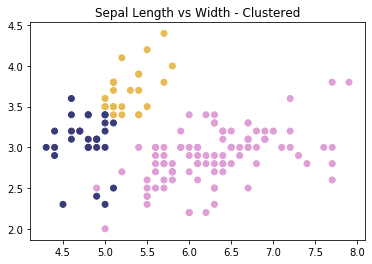

In [25]:
plt.scatter(X['SepalLengthCm'], X['SepalWidthCm'], c=labels, cmap='tab20b')
plt.title('Sepal Length vs Width - Clustered')
plt.show()

In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)

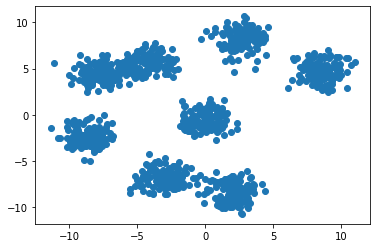

In [27]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [28]:
distances = linkage(X, method="centroid", metric='euclidean')
print(distances)

[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98900000e+03 1.99200000e+03 7.81168528e+00 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 1.02408477e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 1.20025814e+01 1.00000000e+03]]


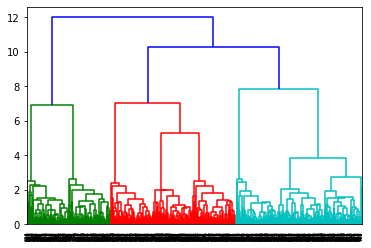

In [29]:
dn = dendrogram(distances)
plt.show()

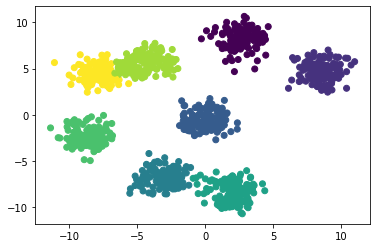

In [30]:
scipy_clusters = fcluster(distances, 3, criterion="distance")
plt.scatter(X[:,0], X[:,1], c=scipy_clusters)
plt.show()

In [31]:
distances = linkage(X, method="single", metric='euclidean')
print(distances)

[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98100000e+03 1.99500000e+03 2.64142511e+00 6.25000000e+02]
 [1.99100000e+03 1.99600000e+03 2.67673403e+00 7.50000000e+02]
 [1.98900000e+03 1.99700000e+03 3.03073416e+00 1.00000000e+03]]


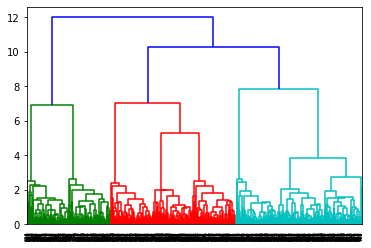

In [34]:
dn = dendrogram(distances)
plt.show()

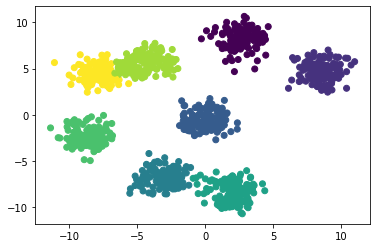

In [33]:
scipy_clusters = fcluster(distances, 3, criterion="distance")
plt.scatter(X[:,0], X[:,1], c=scipy_clusters)
plt.show()

In [37]:
distances = linkage(X, method="complete", metric='euclidean')
print(distances)

[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98400000e+03 1.99200000e+03 1.36113696e+01 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 2.14066080e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 2.35061237e+01 1.00000000e+03]]


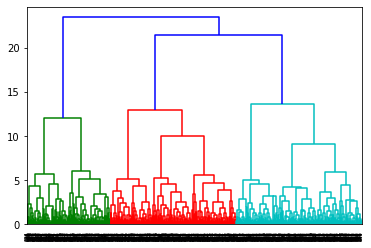

In [38]:
dn = dendrogram(distances)
plt.show()

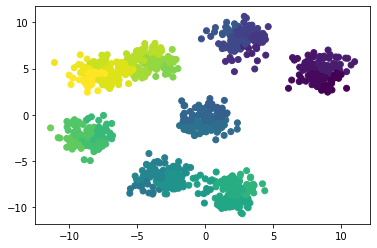

In [39]:
scipy_clusters = fcluster(distances, 3, criterion="distance")
plt.scatter(X[:,0], X[:,1], c=scipy_clusters)
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
ac = AgglomerativeClustering(n_clusters = 8, affinity='euclidean', linkage='centroid')
X, y = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)
distances = linkage(X, method="complete", metric="euclidean")
scipy_clusters = fcluster(distances, 3,  criterion="distance")

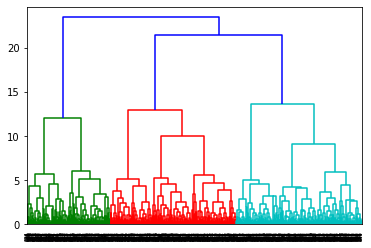

In [48]:
dn = dendrogram(distances)
plt.show()

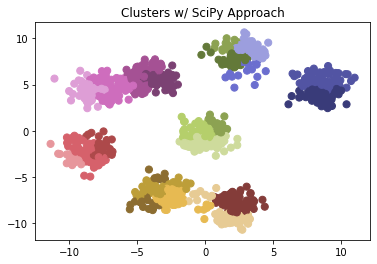

In [49]:
plt.figure(figsize=(6, 4))
plt.title('Clusters w/ SciPy Approach')
plt.scatter(X[:,0], X[:,1], c = scipy_clusters, s = 50, cmap='tab20b')
plt.show()

In [62]:
methods = ['centroid', 'single', 'complete']

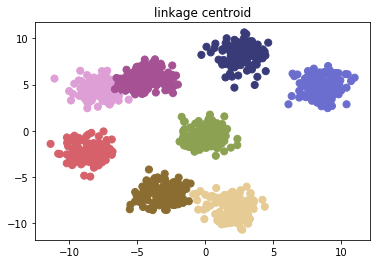

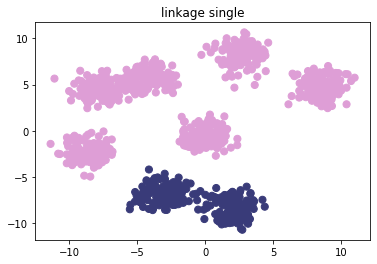

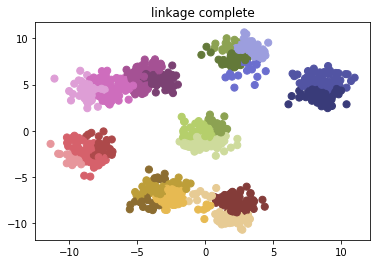

In [63]:
for method in methods:
    distances = linkage(X, method=method, metric="euclidean")
    clusters = fcluster(distances, 3, criterion="distance")
    plt.figure(figsize=(6, 4))
    plt.title('linkage ' + method)
    plt.scatter(X[:,0], X[:,1], c = clusters, s = 50, cmap='tab20b')
    plt.show()